## <span style="color:blue">Linear Regression using Sklearn Library and using best fit line method-OLS(Ordinary Least Square)

Youtube Video Explanation : https://youtu.be/gn1EuKja3LQ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
X = np.array([3,4,6,12,9,15,10,1,8,13]).reshape(-1,1)  ## Experience
y = np.array([16,29,43,65,51,89,57,9,53,68]) # Salary

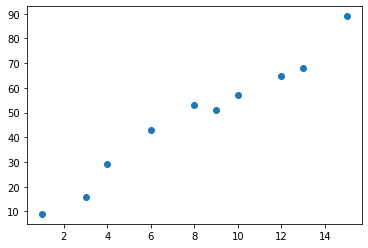

In [3]:
plt.scatter(X,y)

If there is a single predictor variable (X1), then the function describes a straight line. If there are two predictor variables, then the function describes a plane. If there are n predictor variables, then the function describes an n-dimensional hyperplane. Here is a plot of a fitted plane with two predictor variables:

In [4]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [5]:
lr.coef_

array([5.26733722])

In [6]:
lr.intercept_

5.334568554790884

In [7]:
y_pred = lr.predict(X)

In [8]:
y_pred

array([21.1365802 , 26.40391742, 36.93859185, 68.54261514, 52.74060349,
       84.34462679, 58.00794071, 10.60190577, 47.47326628, 73.80995236])

In [9]:
mse = mean_squared_error(y,y_pred)
mse

17.499947061937544

In [10]:
SSE = mse * len(X)
SSE

174.99947061937544

In [11]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse

4.183293805356915

In [12]:
# lets check predictions with new regressors,
x_new_sk = np.arange(10).reshape(-1, 1)
print(x_new_sk)
print("y_pred_sk_new :",lr.predict(x_new_sk))

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y_pred_sk_new : [ 5.33456855 10.60190577 15.86924299 21.1365802  26.40391742 31.67125463
 36.93859185 42.20592906 47.47326628 52.74060349]


In [13]:
r2_score(y,y_pred)

0.9676884286153296

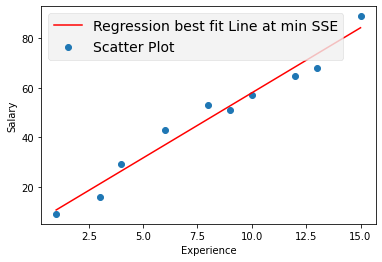

In [14]:
# Making predictions
plt.scatter(X, y,label='Scatter Plot') 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red',label='Regression best fit Line at min SSE')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.style.use('fivethirtyeight')
plt.legend()
plt.show()

## <span style="color:blue">How to calculate slope(m) and intercept(c) in the Sklearn Library using best fit line method-OLS(Ordinary Least Square)

#### <span style="color:red">The LinearRegression model in sklearn is just a fancy wrapper of the least squares solver (scipy.linalg.lstsq) built into scipy(https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html) . From a quick scan of the code, it appears to be using the LAPACK gelsd solver to obtain a solution to the least squares problem.
    
This is the fundamental method of calculating least-square solution to a linear system of equation by matrix factorization. It comes from the handy linear algebra module of numpy package. Under the hood, it solves the equation a x = b by computing a vector x that minimizes the Euclidean 2-norm || b — a x ||.
    
https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/

In [15]:
from scipy.linalg import lstsq
# Compute least-squares solution to equation mx = y.
# Compute a vector x such that the 2-norm |y - mx|^2 is minimized.

In [16]:
## Simple Linear regression

In [17]:
import numpy as np
x = np.array([3,4,6,12,9,15,10,1,8,13])
y = np.array([16,29,43,65,51,89,57,9,53,68])

In [18]:
np.ones(x.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
# np.c_ Translates slice objects to concatenation along the second axis.
X = np.c_[np.ones(x.shape[0]),x]  # add bias term or we called it as intercept ("c")
coeff_intercept,residuals,rank,s = lstsq(X, y)

In [20]:
coeff_intercept

array([5.33456855, 5.26733722])

In [21]:
residuals

174.9994706193754

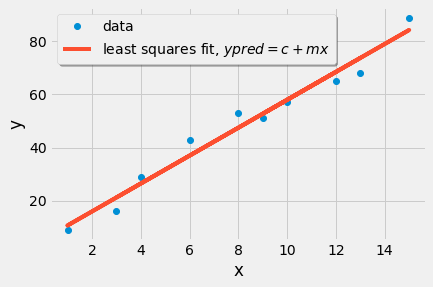

In [22]:
# y = c + m*x
plt.plot(x, y, 'o', label='data')
y_pred = coeff_intercept[0] + coeff_intercept[1]*x
plt.plot(x, y_pred, label='least squares fit, $ypred = c + mx$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(shadow=True)
plt.show()

In [23]:
## Multiple Linear regression

In [24]:
# Moreover, np.linalg.lstsq seems to only accept a 2D array for A, 
# which means that you can do the least-square for one variable at once.
import numpy as np

y = np.array([-6, -5, -10, -5, -8, -3, -6, -8, -8])
x = np.array([
        [-4.95, -4.55, -10.96, -1.08, -6.52, -0.81, -7.01, -4.46, -11.54],
        [-5.87, -4.52, -11.64, -3.36, -7.45, -2.36, -7.33, -7.65, -10.03],
        [-0.76, -0.71, -0.98, 0.75, -0.86, -0.50, -0.33, -0.94, -1.03],
        [14.73, 13.74, 15.49, 24.72, 16.59, 22.44, 13.93, 11.40, 18.18],
        [4.02, 4.47, 4.18, 4.96, 4.29, 4.81, 4.32, 4.43, 4.28],
        [0.20, 0.16, 0.19, 0.16, 0.10, 0.15, 0.21, 0.16, 0.21],
        [0.45, 0.50, 0.53, 0.60, 0.48, 0.53, 0.50, 0.49, 0.55]])

In [25]:
x.shape,y.shape

((7, 9), (9,))

In [26]:
X = x.T  # transpose so input vectors are along the rows

In [27]:
X.shape,y.shape

((9, 7), (9,))

In [28]:
X_new = np.c_[X, np.ones(X.shape[0])]  # add bias term
coeff_intercept,residuals,rank,s = np.linalg.lstsq(X_new, y, rcond=None)

In [29]:
print("intercept",coeff_intercept[-1])
print("coefficients",coeff_intercept[0:-1])

intercept -19.080850659757925
coefficients [ -0.49104607   0.83271938   0.0860167    0.1326091    6.85681762
  22.98163883 -41.08437805]


In [30]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [31]:
lr.intercept_,lr.coef_

(-19.08085065975812,
 array([ -0.49104607,   0.83271938,   0.0860167 ,   0.1326091 ,
          6.85681762,  22.98163883, -41.08437805]))